In [1]:
# cargar librerías
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely
from shapely.geometry import Point
import pysal as ps
from pysal.contrib.viz import mapping as maps
from scipy import ndimage

In [2]:
# ruta a los datos

path = '../Datos/'
print(path)

../Datos/


In [3]:
# cargar shapefile de accidentes
 
acc_link = path + '4_accidentes/Accidentalidad_2016.shp'
acc = gpd.read_file(acc_link)
print(list(acc), "Registros:", len(acc))

['OBJECTID', 'X', 'Y', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO', 'CLASE', 'DIRECCION', 'DIRECCION_', 'CBML', 'TIPO_GEOCO', 'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'geometry'] Registros: 42836


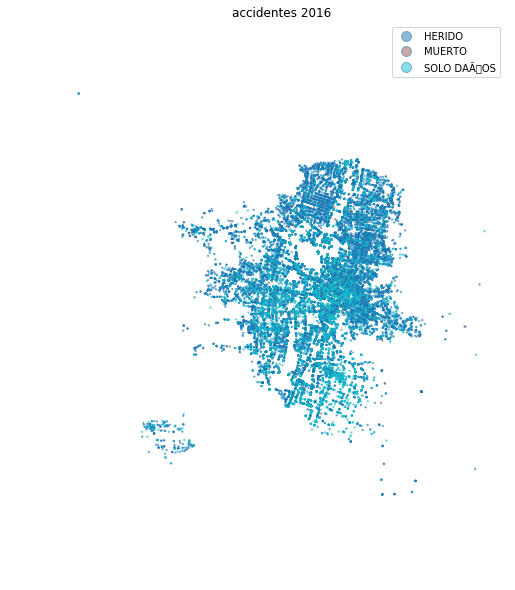

In [4]:
# visualización de mapa de accidentes por gravedad

f, ax = plt.subplots(1, figsize=(8, 10))
ax = acc.plot(ax=ax, alpha=0.5, legend=True, categorical=True, column='GRAVEDAD', markersize = 2)
plt.axis('equal')
ax.set_title('accidentes 2016')
ax.set_axis_off()
plt.show()

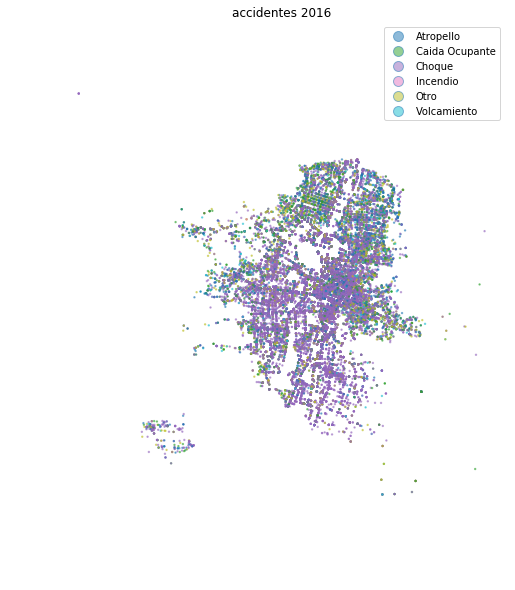

In [4]:
# visualización de mapa de accidentes por clase

f, ax = plt.subplots(1, figsize=(8, 10))
ax = acc.plot(ax=ax, alpha=0.5, legend=True, categorical=True, column='CLASE', markersize = 2)
plt.axis('equal')
ax.set_title('accidentes 2016')
ax.set_axis_off()
plt.show()

In [5]:
# valores únicos del atributo RADICADO en acc

acc['RADICADO'].nunique()

42833

In [6]:
# cargar tabla de accidentes completa (full) para join con shapefile

ac_f_link = path + '4_accidentes/BD_acc_full.csv'
ac_f = pd.read_csv(ac_f_link, low_memory = False)
list(ac_f)

['RADICADO',
 'EXPEDIENTE',
 'FECHA_ACCIDENTE',
 'HORA_ACCIDENTE',
 'CLASE_ACCIDENTE',
 'GRAVEDAD_ACCIDENTE',
 'CLASE_VEHICULO',
 'NUMERO_PLACA',
 'EDAD_CONDUCTOR',
 'SEXO',
 'DIRECCION',
 'Da',
 'rad_f']

In [7]:
# número de registros en ac_f
len(ac_f)

684888

In [8]:
# valores únicos del atributo RADICADO en ac_f

ac_f['RADICADO'].nunique()

398318

In [9]:
# join de geodataframe acc con dataframe ac_f

acc_j = ac_f.merge(acc, on='RADICADO')
acc_j.tail()

RADICADO  EXPEDIENTE FECHA_ACCIDENTE HORA_ACCIDENTE CLASE_ACCIDENTE  \
73604  1565453  A000492734      31/12/2016       22:04:00          Choque   
73605  1565453  A000492734      31/12/2016       22:04:00          Choque   
73606  1565264  A000492701      31/12/2016       22:30:00            Otro   
73607  1565351  A000492946      31/12/2016       22:40:00          Choque   
73608  1565351  A000492946      31/12/2016       22:40:00          Choque   

      GRAVEDAD_ACCIDENTE CLASE_VEHICULO NUMERO_PLACA EDAD_CONDUCTOR SEXO  \
73604             HERIDO      AUTOMOVIL       STU503             60    M   
73605             HERIDO    MOTOCICLETA       DFX54A             23    M   
73606             HERIDO    MOTOCICLETA       XJU46A             43    M   
73607          SOLO DAOS      AUTOMOVIL       BZN135             32    F   
73608          SOLO DAOS      AUTOMOVIL       FHH998             58    M   

                   ...                CLASE      DIRECCION_y  \
73604              ...               Choque  CR 51 CL 10 Sur   
73605              ...               Choque  CR 51 CL 10 Sur   
73606              ...                 Otro  CL 42 Sur CR 83   
73607              ...               Choque  CR 64 C CL 72 A   
73608              ...               Choque  CR 64 C CL 72 A   

                         DIRECCION_  CBML                        TIPO_GEOCO  \
73604     CR  051  S 010  000 00000  1510                        Malla vial   
73605     CR  051  S 010  000 00000  1510                        Malla vial   
73606     CL S 042   083  000 00000  8000        Malla vial cruce invertido   
73607  CR  064 C   072 A  000 00000  0517  Malla vial aproximada: CR 64C-72   
73608  CR  064 C   072 A  000 00000  0517  Malla vial aproximada: CR 64C-72   

          GRAVEDAD                         BARRIO  \
73604       HERIDO                       Guayabal   
73605       HERIDO                       Guayabal   
73606       HERIDO  Cabecera San Antonio de Prado   
73607  SOLO DAÃOS                         Caribe   
73608  SOLO DAÃOS                         Caribe   

                                      COMUNA        DISENO  \
73604                               Guayabal  Interseccion   
73605                               Guayabal  Interseccion   
73606  Corregimiento de San Antonio de Prado  Tramo de via   
73607                               Castilla  Tramo de via   
73608                               Castilla  Tramo de via   

                           geometry  
73604  POINT (832939.38 1177473.14)  
73605  POINT (832939.38 1177473.14)  
73606  POINT (824931.64 1175914.32)  
73607   POINT (834387.11 1185375.4)  
73608   POINT (834387.11 1185375.4)  

[5 rows x 30 columns]

In [10]:
# chequeo de datos después del join
# Conteo de registros y valores únicos en RADICADO

print('Registros: ', len(acc_j))
print('Valores únicos de RADICADO: ', len(acc_j['RADICADO'].value_counts()))

Registros:  73609
Valores únicos de RADICADO:  42601


In [11]:
# conteo de valores únicos en CLASE_VEHICULO

acc_j['CLASE_VEHICULO'].value_counts()

MOTOCICLETA               28945
AUTOMOVIL                 25546
CAMIONETA                  5556
BUS                        3864
CAMION                     2442
CAMPERO                    2386
MICRO BUS                  1692
BUSETA                     1487
BICICLETA                   714
VOLQUETA                    413
TRACTOCAMION                309
MOTOCARRO                    85
DESCONOCIDA                  48
BUS ARTICULADO               20
MOTOCICLO                    20
MAQ. INDUSTRIAL              15
AUTOHORMIGONERA              11
CARRETILLA ELEVADORA          8
CAMION D.TROQUE               6
DESCONOCIDO                   6
TRACTO-CAMION REMOLQUE        4
ABONADORA                     4
MINICARGADOR                  3
CAMION CARGA EXTENSA          3
CUATRIMOTO                    3
TRACCION ANIMAL               3
MONTACARGA                    2
TRICICLO                      2
CARGADOR                      2
REMOLQUE                      1
MINI BUS                      1
MAQUINA 

In [12]:
# agrupación según CLASE_VEHICULO

ac_vehi = pd.crosstab(acc_j.RADICADO, acc_j.CLASE_VEHICULO).reset_index()
ac_vehi

CLASE_VEHICULO  RADICADO  ABONADORA  AUTOHORMIGONERA  AUTOMOVIL  BICICLETA  \
0                1517729          0                0          0          0   
1                1517730          0                0          1          0   
2                1517731          0                0          0          0   
3                1517733          0                0          1          0   
4                1517734          0                0          0          0   
5                1517735          0                0          0          0   
6                1517736          0                0          0          0   
7                1517737          0                0          0          0   
8                1517739          0                0          0          0   
9                1517740          0                0          1          0   
10               1517741          0                0          0          0   
11               1517743          0                0          0          0   
12               1517744          0                0          0          0   
13               1517745          0                0          0          0   
14               1517746          0                0          0          0   
15               1517747          0                0          0          0   
16               1517748          0                0          0          0   
17               1517749          0                0          0          0   
18               1517750          0                0          0          0   
19               1517751          0                0          0          0   
20               1517752          0                0          0          0   
21               1517766          0                0          0          0   
22               1517767          0                0          1          0   
23               1517768          0                0          0          0   
24               1517769          0                0          0          0   
25               1517771          0                0          0          0   
26               1517772          0                0          1          0   
27               1517773          0                0          2          0   
28               1517775          0                0          0          0   
29               1517776          0                0          0          0   
...                  ...        ...              ...        ...        ...   
42571            1565379          0                0          1          0   
42572            1565381          0                0          1          0   
42573            1565383          0                0          1          0   
42574            1565386          0                0          2          0   
42575            1565388          0                0          1          0   
42576            1565390          0                0          0          0   
42577            1565391          0                0          0          0   
42578            1565392          0                0          1          0   
42579            1565393          0                0          0          0   
42580            1565394          0                0          1          0   
42581            1565395          0                0          2          0   
42582            1565397          0                0          1          0   
42583            1565398          0                0          0          0   
42584            1565399          0                0          1          0   
42585            1565402          0                0          2          0   
42586            1565406          0                0          0          0   
42587            1565409          0                0          0          0   
42588            1565412          0                0          1          0   
42589            1565418          0                0          0          0   
42590            15654

In [13]:
# Conteo de registros y valores únicos en RADICADO

print('Registros: ', len(ac_vehi))
print('Valores únicos de RADICADO: ', len(ac_vehi['RADICADO'].value_counts()))

Registros:  42601
Valores únicos de RADICADO:  42601


In [14]:
# conteo de valores únicos en CLASE en shapefile de accidentes (acc)

acc['CLASE'].value_counts()

Choque            28631
Otro               4870
Atropello          4167
Caida Ocupante     3680
Volcamiento        1484
Incendio              4
Name: CLASE, dtype: int64

In [15]:
# agrupación según CLASE

ac_clas = pd.crosstab(acc_j.RADICADO, acc_j.CLASE).reset_index()
ac_clas

CLASE  RADICADO  Atropello  Caida Ocupante  Choque  Incendio  Otro  \
0       1517729          2               0       0         0     0   
1       1517730          0               0       2         0     0   
2       1517731          0               0       2         0     0   
3       1517733          0               0       2         0     0   
4       1517734          0               0       2         0     0   
5       1517735          1               0       0         0     0   
6       1517736          1               0       0         0     0   
7       1517737          1               0       0         0     0   
8       1517739          1               0       0         0     0   
9       1517740          1               0       0         0     0   
10      1517741          0               0       2         0     0   
11      1517743          1               0       0         0     0   
12      1517744          0               1       0         0     0   
13      1517745          0               0       0         0     1   
14      1517746          0               1       0         0     0   
15      1517747          0               1       0         0     0   
16      1517748          0               1       0         0     0   
17      1517749          0               1       0         0     0   
18      1517750          0               1       0         0     0   
19      1517751          0               1       0         0     0   
20      1517752          0               1       0         0     0   
21      1517766          0               1       0         0     0   
22      1517767          0               0       2         0     0   
23      1517768          0               0       0         0     1   
24      1517769          0               0       0         0     0   
25      1517771          0               0       2         0     0   
26      1517772          0               0       2         0     0   
27      1517773          0               0       2         0     0   
28      1517775          0               0       0         0     1   
29      1517776          0               0       0         0     1   
...         ...        ...             ...     ...       ...   ...   
42571   1565379          0               0       2         0     0   
42572   1565381          0               0       2         0     0   
42573   1565383          0               0       2         0     0   
42574   1565386          0               0       3         0     0   
42575   1565388          0               0       2         0     0   
42576   1565390          0               0       2         0     0   
42577   1565391          0               0       2         0     0   
42578   1565392          0               0       2         0     0   
42579   1565393          0               0       2         0     0   
42580   1565394          0               0       2         0     0   
42581   1565395          0               0       2         0     0   
42582   1565397          0               0       2         0     0   
42583   1565398          0               0       2         0     0   
42584   1565399          0               0       2         0     0   
42585   1565402          0               0       2         0     0   
42586   1565406          0               0       2         0     0   
42587   1565409          0               0       2         0     0   
42588   1565412          0               0       1         0     0   
42589   1565418          0               0       2         0     0   
42590   1565453          0               0       2         0     0   
42591   1565456          0               0       2         0     0   
42592   1565460          0               0       2         0     0   
42593   1565462          0               0       2         0     0   
42594   1565473          0               0       2         0     0   
42595   1565498          0               0       2         0     0   
42596   15

In [16]:
# cada evento puede estar representado más de una vez en esta tabla... 
# cada radicado debe corresponder a un solo evento
# el número obtenido en la operación anterior corresponde al 
# número de actores implicados en cada accidente

# reemplazar valores > 0 por 1, para que el conteo de eventos por celdas sea correcto
ac_clas.loc[ac_clas['Atropello'] > 0, 'Atropello'] = 1
ac_clas.loc[ac_clas['Caida Ocupante'] > 0, 'Caida Ocupante'] = 1
ac_clas.loc[ac_clas['Choque'] > 0, 'Choque'] = 1
ac_clas.loc[ac_clas['Incendio'] > 0, 'Incendio'] = 1
ac_clas.loc[ac_clas['Otro'] > 0, 'Otro'] = 1
ac_clas.loc[ac_clas['Volcamiento'] > 0, 'Volcamiento'] = 1
ac_clas

CLASE  RADICADO  Atropello  Caida Ocupante  Choque  Incendio  Otro  \
0       1517729          1               0       0         0     0   
1       1517730          0               0       1         0     0   
2       1517731          0               0       1         0     0   
3       1517733          0               0       1         0     0   
4       1517734          0               0       1         0     0   
5       1517735          1               0       0         0     0   
6       1517736          1               0       0         0     0   
7       1517737          1               0       0         0     0   
8       1517739          1               0       0         0     0   
9       1517740          1               0       0         0     0   
10      1517741          0               0       1         0     0   
11      1517743          1               0       0         0     0   
12      1517744          0               1       0         0     0   
13      1517745          0               0       0         0     1   
14      1517746          0               1       0         0     0   
15      1517747          0               1       0         0     0   
16      1517748          0               1       0         0     0   
17      1517749          0               1       0         0     0   
18      1517750          0               1       0         0     0   
19      1517751          0               1       0         0     0   
20      1517752          0               1       0         0     0   
21      1517766          0               1       0         0     0   
22      1517767          0               0       1         0     0   
23      1517768          0               0       0         0     1   
24      1517769          0               0       0         0     0   
25      1517771          0               0       1         0     0   
26      1517772          0               0       1         0     0   
27      1517773          0               0       1         0     0   
28      1517775          0               0       0         0     1   
29      1517776          0               0       0         0     1   
...         ...        ...             ...     ...       ...   ...   
42571   1565379          0               0       1         0     0   
42572   1565381          0               0       1         0     0   
42573   1565383          0               0       1         0     0   
42574   1565386          0               0       1         0     0   
42575   1565388          0               0       1         0     0   
42576   1565390          0               0       1         0     0   
42577   1565391          0               0       1         0     0   
42578   1565392          0               0       1         0     0   
42579   1565393          0               0       1         0     0   
42580   1565394          0               0       1         0     0   
42581   1565395          0               0       1         0     0   
42582   1565397          0               0       1         0     0   
42583   1565398          0               0       1         0     0   
42584   1565399          0               0       1         0     0   
42585   1565402          0               0       1         0     0   
42586   1565406          0               0       1         0     0   
42587   1565409          0               0       1         0     0   
42588   1565412          0               0       1         0     0   
42589   1565418          0               0       1         0     0   
42590   1565453          0               0       1         0     0   
42591   1565456          0               0       1         0     0   
42592   1565460          0               0       1         0     0   
42593   1565462          0               0       1         0     0   
42594   1565473          0               0       1         0     0   
42595   1565498          0               0       1         0     0   
42596   15

In [17]:
# join de puntos de accidentes con conteo según CLASE_VEHICULO

acc_j_v = gpd.GeoDataFrame(ac_vehi.merge(acc, on="RADICADO"), geometry='geometry')
print("acc_j_v: ", type(acc_j_v))
#list(acc_j_v)

# join con conteo según CLASE (de accidente)
acc_j_v_c = gpd.GeoDataFrame(ac_clas.merge(acc_j_v, on="RADICADO"), geometry='geometry')
print("acc_j_v_c: ", type(acc_j_v_c))
#list(acc_j_v_c)
#acc_j_v_c.tail()
acc_j_v_c.shape

acc_j_v:  <class 'geopandas.geodataframe.GeoDataFrame'>
acc_j_v_c:  <class 'geopandas.geodataframe.GeoDataFrame'>


(42601, 58)

In [18]:
acc_j_v_c

RADICADO  Atropello  Caida Ocupante  Choque  Incendio  Otro  \
0      1517729          1               0       0         0     0   
1      1517730          0               0       1         0     0   
2      1517731          0               0       1         0     0   
3      1517733          0               0       1         0     0   
4      1517734          0               0       1         0     0   
5      1517735          1               0       0         0     0   
6      1517736          1               0       0         0     0   
7      1517737          1               0       0         0     0   
8      1517739          1               0       0         0     0   
9      1517740          1               0       0         0     0   
10     1517741          0               0       1         0     0   
11     1517743          1               0       0         0     0   
12     1517744          0               1       0         0     0   
13     1517745          0               0       0         0     1   
14     1517746          0               1       0         0     0   
15     1517747          0               1       0         0     0   
16     1517748          0               1       0         0     0   
17     1517749          0               1       0         0     0   
18     1517750          0               1       0         0     0   
19     1517751          0               1       0         0     0   
20     1517752          0               1       0         0     0   
21     1517766          0               1       0         0     0   
22     1517767          0               0       1         0     0   
23     1517768          0               0       0         0     1   
24     1517769          0               0       0         0     0   
25     1517771          0               0       1         0     0   
26     1517772          0               0       1         0     0   
27     1517773          0               0       1         0     0   
28     1517775          0               0       0         0     1   
29     1517776          0               0       0         0     1   
...        ...        ...             ...     ...       ...   ...   
42571  1565379          0               0       1         0     0   
42572  1565381          0               0       1         0     0   
42573  1565383          0               0       1         0     0   
42574  1565386          0               0       1         0     0   
42575  1565388          0               0       1         0     0   
42576  1565390          0               0       1         0     0   
42577  1565391          0               0       1         0     0   
42578  1565392          0               0       1         0     0   
42579  1565393          0               0       1         0     0   
42580  1565394          0               0       1         0     0   
42581  1565395          0               0       1         0     0   
42582  1565397          0               0       1         0     0   
42583  1565398          0               0       1         0     0   
42584  1565399          0               0       1         0     0   
42585  1565402          0               0       1         0     0   
42586  1565406          0               0       1         0     0   
42587  1565409          0               0       1         0     0   
42588  1565412          0               0       1         0     0   
42589  1565418          0               0       1         0     0   
42590  1565453          0               0       1         0     0   
42591  1565456          0               0       1         0     0   
42592  1565460          0               0       1         0     0   
42593  1565462          0               0       1         0     0   
42594  1565473          0               0       1         0     0   
42595  1565498          0               0       1         0     0   
42596  1565513          0               0       1         0     0   
4259

In [19]:
# mapa de calor accidentes, función general
# código tomado de Matthew Perry, http://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


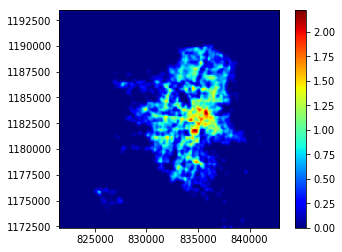

In [20]:
# mapa de calor accidentes - todos

heatmap(acc_j_v_c, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


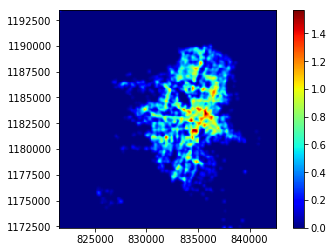

In [21]:
# mapa de calor accidentes - moto

ac_sel = acc_j_v_c[(acc_j_v_c['MOTOCICLETA'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


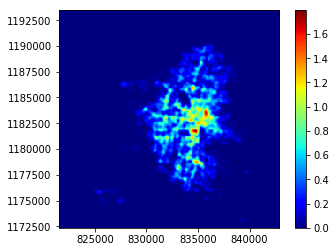

In [22]:
# mapa de calor accidentes - automovil

ac_sel = acc_j_v_c[(acc_j_v_c['AUTOMOVIL'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


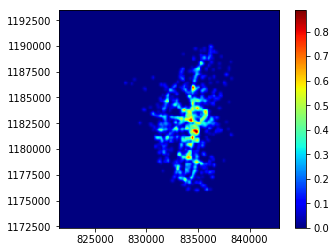

In [23]:
# mapa de calor accidentes - camioneta

ac_sel = acc_j_v_c[(acc_j_v_c['CAMIONETA'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


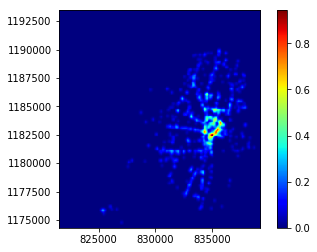

In [24]:
# mapa de calor accidentes - bus

ac_sel = acc_j_v_c[(acc_j_v_c['BUS'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


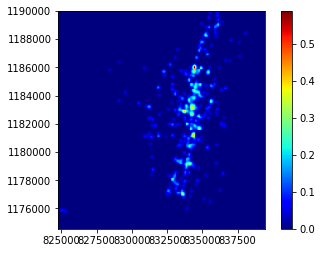

In [25]:
# mapa de calor accidentes - camión

ac_sel = acc_j_v_c[(acc_j_v_c['CAMION'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


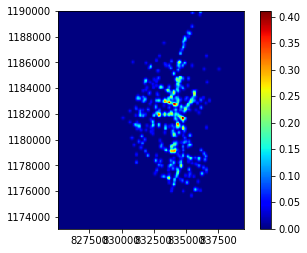

In [26]:
# mapa de calor accidentes - campero

ac_sel = acc_j_v_c[(acc_j_v_c['CAMPERO'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


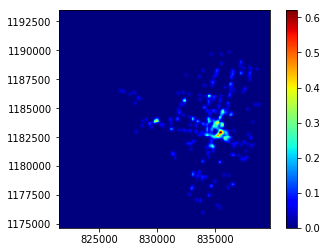

In [27]:
# mapa de calor accidentes - micro bus

ac_sel = acc_j_v_c[(acc_j_v_c['MICRO BUS'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


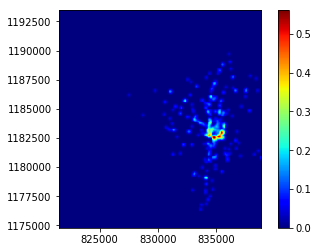

In [28]:
# mapa de calor accidentes - buseta

ac_sel = acc_j_v_c[(acc_j_v_c['BUSETA'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


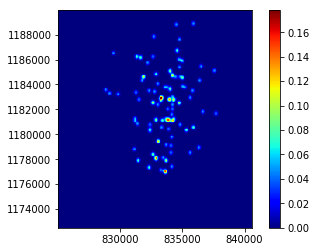

In [29]:
# mapa de calor accidentes - bicicleta

ac_sel = acc_j_v_c[(acc_j_v_c['BICICLETA'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


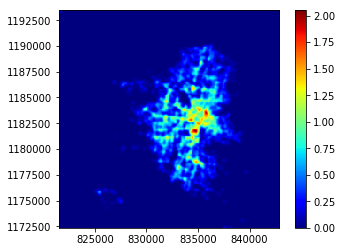

In [30]:
# mapa de calor accidentes - choque

ac_sel = acc_j_v_c[(acc_j_v_c['Choque'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


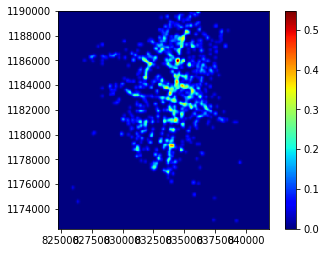

In [31]:
# mapa de calor accidentes - Otro

ac_sel = acc_j_v_c[(acc_j_v_c['Otro'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


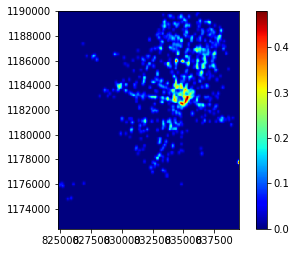

In [32]:
# mapa de calor accidentes - Atropello

ac_sel = acc_j_v_c[(acc_j_v_c['Atropello'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


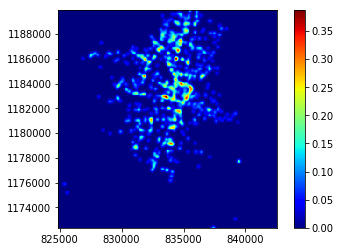

In [33]:
# mapa de calor accidentes - caída de ocupante

ac_sel = acc_j_v_c[(acc_j_v_c['Caida Ocupante'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

/Users/jorgepatino/miniconda3/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


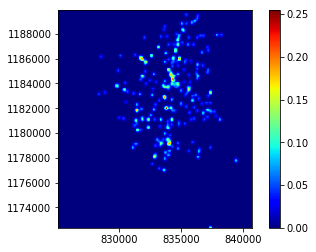

In [34]:
# mapa de calor accidentes - volcamiento

ac_sel = acc_j_v_c[(acc_j_v_c['Volcamiento'] > 0)]
heatmap(ac_sel, bins=250, smoothing=1.5)

In [35]:
# cargar shapefiles de mallas para conteos de accidentes

m250 = gpd.read_file(path+'1_square_grids/m250.shp').set_index('id')
m350 = gpd.read_file(path+'1_square_grids/m350.shp').set_index('id')
m500 = gpd.read_file(path+'1_square_grids/m500.shp').set_index('id')

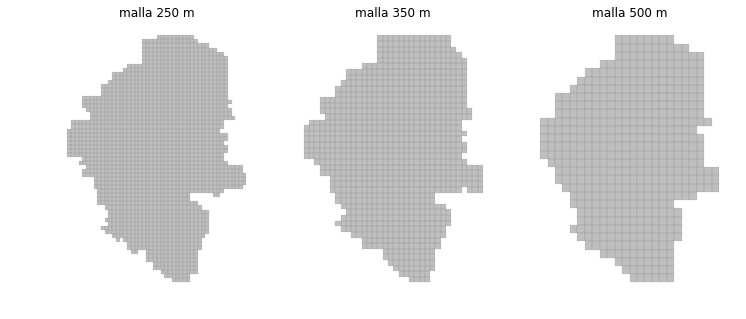

In [36]:
# visualizar mallas en tira

mapas = ['m250', 'm350', 'm500']

# crear figura y ejes axes (3 x 1)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# malla 250 metros
# ploteo del mapa
m250.plot(ax=ax1, facecolor = 'gray', linewidth=0.1, edgecolor='black', alpha= 0.5)
# quitar ejes
ax1.set_axis_off()
# título del mapa
ax1.set_title('malla 250 m')

# malla 350 metros
# ploteo del mapa
m350.plot(ax=ax2, facecolor = 'gray', linewidth=0.1, edgecolor='black', alpha= 0.5)
# quitar ejes
ax2.set_axis_off()
# título del mapa
ax2.set_title('malla 350 m')

# malla 500 metros
# ploteo del mapa
m500.plot(ax=ax3, facecolor = 'gray', linewidth=0.1, edgecolor='black', alpha= 0.5)
# quitar ejes
ax3.set_axis_off()
# título del mapa
ax3.set_title('malla 500 m')

# desplegar figura
plt.show()

In [37]:
# conteo de puntos en polígonos de m250

# definir el CRS con base en m250 (están en el mismo sistema de coordenadas)
acc_j_v_c.crs = m250.crs

#lista de operaciones de agregación en campo(acc_j_v_c)
aggregations = {'Atropello':'sum', 'Caida Ocupante':'sum', 'Choque':'sum', \
               'Incendio':'sum', 'Volcamiento':'sum', 'Otro':'sum', \
               'ABONADORA':'sum', 'AUTOHORMIGONERA':'sum', 'AUTOMOVIL':'sum', \
               'BICICLETA':'sum', 'BUS':'sum', 'BUS ARTICULADO':'sum', 'BUSETA':'sum', \
               'CAMION':'sum', 'CAMION CARGA EXTENSA':'sum', 'CAMION D.TROQUE':'sum', \
               'CAMIONETA':'sum', 'CAMPERO':'sum', 'CARGADOR':'sum', 'CARRETILLA ELEVADORA':'sum', \
               'CUATRIMOTO':'sum', 'DESCONOCIDA':'sum', 'DESCONOCIDO':'sum', 'MAQ. AGRICOLA':'sum', \
               'MAQ. INDUSTRIAL':'sum', 'MAQUINA BARREDORA':'sum', 'MICRO BUS':'sum', 'MINI BUS':'sum', \
               'MINICARGADOR':'sum', 'MONTACARGA':'sum', 'MOTOCARRO':'sum', 'MOTOCICLETA':'sum', \
               'MOTOCICLO':'sum', 'REMOLQUE':'sum', 'TRACCION ANIMAL':'sum', 'TRACTO-CAMION REMOLQUE':'sum', \
               'TRACTOCAMION':'sum', 'TRACTOR':'sum', 'TRICICLO':'sum', 'VOLQUETA':'sum'}
             
#spatial join con groupby para resumir (sumatoria) los datos de columnas de interés
m250_acc = gpd.sjoin(acc_j_v_c, m250.reset_index(), op='within').groupby('id').agg(aggregations)

# agregar columnas al geodataframe
for field in aggregations:
    m250[field] = m250_acc[field]

# cambiar NaN por 0    
m250.fillna(value=0, inplace = True)

# columna nueva con el total
m250['TOTAL'] = m250['Atropello'] + m250['Caida Ocupante'] + m250['Choque'] \
                + m250['Incendio'] + m250['Volcamiento'] + m250['Otro']

m250

xmin           xmax          ymin          ymax  \
id                                                               
24    833898.497295  834148.497295  1.189812e+06  1.190062e+06   
25    834148.497295  834398.497295  1.189812e+06  1.190062e+06   
26    834398.497295  834648.497295  1.189812e+06  1.190062e+06   
27    834648.497295  834898.497295  1.189812e+06  1.190062e+06   
28    834898.497295  835148.497295  1.189812e+06  1.190062e+06   
29    835148.497295  835398.497295  1.189812e+06  1.190062e+06   
30    835398.497295  835648.497295  1.189812e+06  1.190062e+06   
31    835648.497295  835898.497295  1.189812e+06  1.190062e+06   
32    835898.497295  836148.497295  1.189812e+06  1.190062e+06   
33    836148.497295  836398.497295  1.189812e+06  1.190062e+06   
68    832898.497295  833148.497295  1.189562e+06  1.189812e+06   
69    833148.497295  833398.497295  1.189562e+06  1.189812e+06   
70    833398.497295  833648.497295  1.189562e+06  1.189812e+06   
71    833648.497295  833898.497295  1.189562e+06  1.189812e+06   
72    833898.497295  834148.497295  1.189562e+06  1.189812e+06   
73    834148.497295  834398.497295  1.189562e+06  1.189812e+06   
74    834398.497295  834648.497295  1.189562e+06  1.189812e+06   
75    834648.497295  834898.497295  1.189562e+06  1.189812e+06   
76    834898.497295  835148.497295  1.189562e+06  1.189812e+06   
77    835148.497295  835398.497295  1.189562e+06  1.189812e+06   
78    835398.497295  835648.497295  1.189562e+06  1.189812e+06   
79    835648.497295  835898.497295  1.189562e+06  1.189812e+06   
80    835898.497295  836148.497295  1.189562e+06  1.189812e+06   
81    836148.497295  836398.497295  1.189562e+06  1.189812e+06   
82    836398.497295  836648.497295  1.189562e+06  1.189812e+06   
116   832898.497295  833148.497295  1.189312e+06  1.189562e+06   
117   833148.497295  833398.497295  1.189312e+06  1.189562e+06   
118   833398.497295  833648.497295  1.189312e+06  1.189562e+06   
119   833648.497295  833898.497295  1.189312e+06  1.189562e+06   
120   833898.497295  834148.497295  1.189312e+06  1.189562e+06   
...             ...            ...           ...           ...   
2763  834648.497295  834898.497295  1.175562e+06  1.175812e+06   
2764  834898.497295  835148.497295  1.175562e+06  1.175812e+06   
2765  835148.497295  835398.497295  1.175562e+06  1.175812e+06   
2766  835398.497295  835648.497295  1.175562e+06  1.175812e+06   
2767  835648.497295  835898.497295  1.175562e+06  1.175812e+06   
2768  835898.497295  836148.497295  1.175562e+06  1.175812e+06   
2769  836148.497295  836398.497295  1.175562e+06  1.175812e+06   
2770  836398.497295  836648.497295  1.175562e+06  1.175812e+06   
2809  834148.497295  834398.497295  1.175312e+06  1.175562e+06   
2810  834398.497295  834648.497295  1.175312e+06  1.175562e+06   
2811  834648.497295  834898.497295  1.175312e+06  1.175562e+06   
2812  834898.497295  835148.497295  1.175312e+06  1.175562e+06   
2813  835148.497295  835398.497295  1.175312e+06  1.175562e+06   
2814  835398.497295  835648.497295  1.175312e+06  1.175562e+06   
2815  835648.497295  835898.497295  1.175312e+06  1.175562e+06   
2816  835898.497295  836148.497295  1.175312e+06  1.175562e+06   
2817  836148.497295  836398.497295  1.175312e+06  1.175562e+06   
2818  836398.497295  836648.497295  1.175312e+06  1.175562e+06   
2858  834398.497295  834648.497295  1.175062e+06  1.175312e+06   
2859  834648.497295  834898.497295  1.175062e+06  1.175312e+06   
2860  834898.497295  835148.497295  1.175062e+06  1.175312e+06   
2861  835148.497295  835398.497295  1.175062e+06  1.175312e+06   
2862  835398.497295  835648.497295  1.175062e+06  1.175312e+06   
2863  835648.497295  835898.497295  1.175062e+06  1.175312e+06   
2864  835898.497295  836148.497295  1.175062e+06  1.175312e+06   
2908  834898.497295  835148.497295  1.174812e+06  1.175062e+06   
2909  835148.497295  835398.497295  1.174812e+06  1.175062e+06   
2910  835398.497295  835648.497295  1.174812e+06  1.175

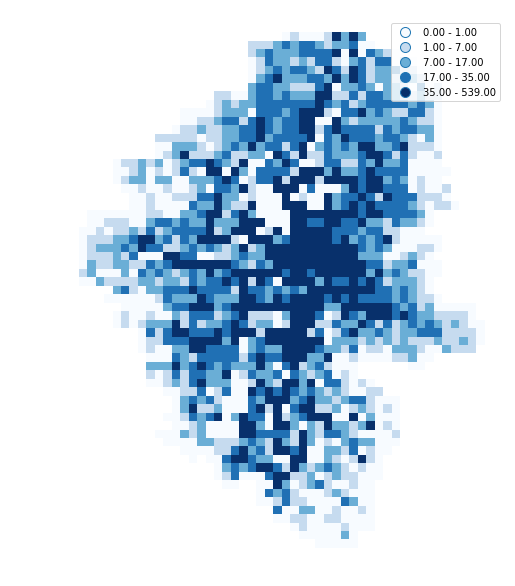

In [38]:
# mapa de total de accidentes en m250

f, ax = plt.subplots(1, figsize=(8, 10))
ax = m250.plot(ax=ax, alpha=1, legend=True, scheme='quantiles', k=5, cmap='Blues', column='TOTAL')
# escala de ejes igual
lims = plt.axis('equal')
# quitar ejes
ax.set_axis_off()
plt.show()

In [39]:
m250['TOTAL'].sum()

41829.0

El número total de accidentes es menor en la malla (41829 en malla vs 42601 en puntos) porque 
no entran en el conteo los eventos localizados por fuera de de la malla (zona rural y al sur occidente
en San Antonio de Prado)
Razón: la imagen satelital no cubre la zona suroccidental y las mallas están ajustadas a la zona urbana.

In [40]:
# escribir m250 (con conteos) en CSV
m250.to_csv(path+"4_accidentes/m250_c.csv")

In [41]:
# conteo de puntos en polígonos de m350
             
#spatial join con groupby para resumir (sumatoria) los datos de columnas de interés
m350_acc = gpd.sjoin(acc_j_v_c, m350.reset_index(), op='within').groupby('id').agg(aggregations)

# agregar columnas al geodataframe
for field in aggregations:
    m350[field] = m350_acc[field]

# cambiar NaN por 0    
m350.fillna(value=0, inplace = True)

# columna nueva con el total
m350['TOTAL'] = m350['Atropello'] + m350['Caida Ocupante'] + m350['Choque'] \
                + m350['Incendio'] + m350['Volcamiento'] + m350['Otro']
    
m350

xmin           xmax          ymin          ymax  \
id                                                               
14    832798.497295  833148.497295  1.189712e+06  1.190062e+06   
15    833148.497295  833498.497295  1.189712e+06  1.190062e+06   
16    833498.497295  833848.497295  1.189712e+06  1.190062e+06   
17    833848.497295  834198.497295  1.189712e+06  1.190062e+06   
18    834198.497295  834548.497295  1.189712e+06  1.190062e+06   
19    834548.497295  834898.497295  1.189712e+06  1.190062e+06   
20    834898.497295  835248.497295  1.189712e+06  1.190062e+06   
21    835248.497295  835598.497295  1.189712e+06  1.190062e+06   
22    835598.497295  835948.497295  1.189712e+06  1.190062e+06   
23    835948.497295  836298.497295  1.189712e+06  1.190062e+06   
24    836298.497295  836648.497295  1.189712e+06  1.190062e+06   
25    836648.497295  836998.497295  1.189712e+06  1.190062e+06   
26    836998.497295  837348.497295  1.189712e+06  1.190062e+06   
27    837348.497295  837698.497295  1.189712e+06  1.190062e+06   
49    832798.497295  833148.497295  1.189362e+06  1.189712e+06   
50    833148.497295  833498.497295  1.189362e+06  1.189712e+06   
51    833498.497295  833848.497295  1.189362e+06  1.189712e+06   
52    833848.497295  834198.497295  1.189362e+06  1.189712e+06   
53    834198.497295  834548.497295  1.189362e+06  1.189712e+06   
54    834548.497295  834898.497295  1.189362e+06  1.189712e+06   
55    834898.497295  835248.497295  1.189362e+06  1.189712e+06   
56    835248.497295  835598.497295  1.189362e+06  1.189712e+06   
57    835598.497295  835948.497295  1.189362e+06  1.189712e+06   
58    835948.497295  836298.497295  1.189362e+06  1.189712e+06   
59    836298.497295  836648.497295  1.189362e+06  1.189712e+06   
60    836648.497295  836998.497295  1.189362e+06  1.189712e+06   
61    836998.497295  837348.497295  1.189362e+06  1.189712e+06   
62    837348.497295  837698.497295  1.189362e+06  1.189712e+06   
84    832798.497295  833148.497295  1.189012e+06  1.189362e+06   
85    833148.497295  833498.497295  1.189012e+06  1.189362e+06   
...             ...            ...           ...           ...   
1387  835598.497295  835948.497295  1.176062e+06  1.176412e+06   
1388  835948.497295  836298.497295  1.176062e+06  1.176412e+06   
1389  836298.497295  836648.497295  1.176062e+06  1.176412e+06   
1416  833498.497295  833848.497295  1.175712e+06  1.176062e+06   
1417  833848.497295  834198.497295  1.175712e+06  1.176062e+06   
1418  834198.497295  834548.497295  1.175712e+06  1.176062e+06   
1419  834548.497295  834898.497295  1.175712e+06  1.176062e+06   
1420  834898.497295  835248.497295  1.175712e+06  1.176062e+06   
1421  835248.497295  835598.497295  1.175712e+06  1.176062e+06   
1422  835598.497295  835948.497295  1.175712e+06  1.176062e+06   
1423  835948.497295  836298.497295  1.175712e+06  1.176062e+06   
1424  836298.497295  836648.497295  1.175712e+06  1.176062e+06   
1452  833848.497295  834198.497295  1.175362e+06  1.175712e+06   
1453  834198.497295  834548.497295  1.175362e+06  1.175712e+06   
1454  834548.497295  834898.497295  1.175362e+06  1.175712e+06   
1455  834898.497295  835248.497295  1.175362e+06  1.175712e+06   
1456  835248.497295  835598.497295  1.175362e+06  1.175712e+06   
1457  835598.497295  835948.497295  1.175362e+06  1.175712e+06   
1458  835948.497295  836298.497295  1.175362e+06  1.175712e+06   
1459  836298.497295  836648.497295  1.175362e+06  1.175712e+06   
1488  834198.497295  834548.497295  1.175012e+06  1.175362e+06   
1489  834548.497295  834898.497295  1.175012e+06  1.175362e+06   
1490  834898.497295  835248.497295  1.175012e+06  1.175362e+06   
1491  835248.497295  835598.497295  1.175012e+06  1.175362e+06   
1492  835598.497295  835948.497295  1.175012e+06  1.175362e+06   
1493  835948.497295  836298.497295  1.175012e+06  1.175362e+06   
1525  834898.497295  835248.497295  1.174662e+06  1.175012e+06   
1526  835248.497295  835598.497295  1.174662e+06  1.175

In [42]:
m350['TOTAL'].sum()

41823.0

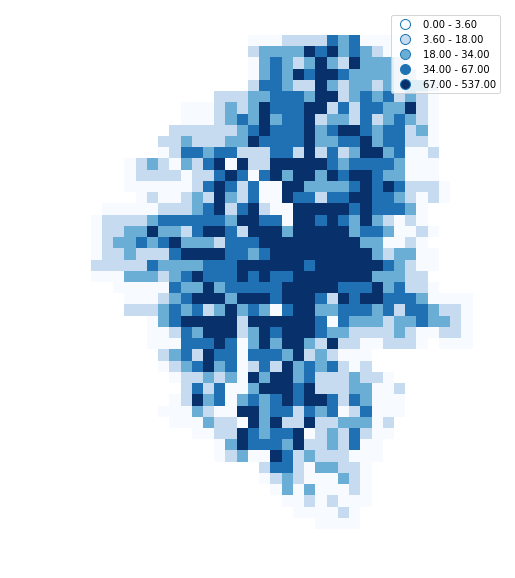

In [43]:
# mapa de total de accidentes en m350

f, ax = plt.subplots(1, figsize=(8, 10))
ax = m350.plot(ax=ax, alpha=1, legend=True, scheme='quantiles', k=5, cmap='Blues', column='TOTAL')
# escala de ejes igual
lims = plt.axis('equal')
# quitar ejes
ax.set_axis_off()
plt.show()

In [44]:
# escribir m350 (con conteos) en csv

m350.to_csv(path+"4_accidentes/m350_c.csv")

In [45]:
# conteo de puntos en polígonos de m500
             
#spatial join con groupby para resumir (sumatoria) los datos de columnas de interés
m500_acc = gpd.sjoin(acc_j_v_c, m500.reset_index(), op='within').groupby('id').agg(aggregations)

# agregar columnas al geodataframe
for field in aggregations:
    m500[field] = m500_acc[field]

# cambiar NaN por 0    
m500.fillna(value=0, inplace = True)

# columna nueva con el total
m500['TOTAL'] = m500['Atropello'] + m500['Caida Ocupante'] + m500['Choque'] \
                + m500['Incendio'] + m500['Volcamiento'] + m500['Otro']
    
m500

xmin           xmax          ymin          ymax  \
id                                                              
10   832898.497295  833398.497295  1.189562e+06  1.190062e+06   
11   833398.497295  833898.497295  1.189562e+06  1.190062e+06   
12   833898.497295  834398.497295  1.189562e+06  1.190062e+06   
13   834398.497295  834898.497295  1.189562e+06  1.190062e+06   
14   834898.497295  835398.497295  1.189562e+06  1.190062e+06   
15   835398.497295  835898.497295  1.189562e+06  1.190062e+06   
16   835898.497295  836398.497295  1.189562e+06  1.190062e+06   
17   836398.497295  836898.497295  1.189562e+06  1.190062e+06   
34   832898.497295  833398.497295  1.189062e+06  1.189562e+06   
35   833398.497295  833898.497295  1.189062e+06  1.189562e+06   
36   833898.497295  834398.497295  1.189062e+06  1.189562e+06   
37   834398.497295  834898.497295  1.189062e+06  1.189562e+06   
38   834898.497295  835398.497295  1.189062e+06  1.189562e+06   
39   835398.497295  835898.497295  1.189062e+06  1.189562e+06   
40   835898.497295  836398.497295  1.189062e+06  1.189562e+06   
41   836398.497295  836898.497295  1.189062e+06  1.189562e+06   
42   836898.497295  837398.497295  1.189062e+06  1.189562e+06   
43   837398.497295  837898.497295  1.189062e+06  1.189562e+06   
58   832898.497295  833398.497295  1.188562e+06  1.189062e+06   
59   833398.497295  833898.497295  1.188562e+06  1.189062e+06   
60   833898.497295  834398.497295  1.188562e+06  1.189062e+06   
61   834398.497295  834898.497295  1.188562e+06  1.189062e+06   
62   834898.497295  835398.497295  1.188562e+06  1.189062e+06   
63   835398.497295  835898.497295  1.188562e+06  1.189062e+06   
64   835898.497295  836398.497295  1.188562e+06  1.189062e+06   
65   836398.497295  836898.497295  1.188562e+06  1.189062e+06   
66   836898.497295  837398.497295  1.188562e+06  1.189062e+06   
67   837398.497295  837898.497295  1.188562e+06  1.189062e+06   
68   837898.497295  838398.497295  1.188562e+06  1.189062e+06   
69   838398.497295  838898.497295  1.188562e+06  1.189062e+06   
..             ...            ...           ...           ...   
633  832398.497295  832898.497295  1.176562e+06  1.177062e+06   
634  832898.497295  833398.497295  1.176562e+06  1.177062e+06   
635  833398.497295  833898.497295  1.176562e+06  1.177062e+06   
636  833898.497295  834398.497295  1.176562e+06  1.177062e+06   
637  834398.497295  834898.497295  1.176562e+06  1.177062e+06   
638  834898.497295  835398.497295  1.176562e+06  1.177062e+06   
639  835398.497295  835898.497295  1.176562e+06  1.177062e+06   
640  835898.497295  836398.497295  1.176562e+06  1.177062e+06   
641  836398.497295  836898.497295  1.176562e+06  1.177062e+06   
658  832898.497295  833398.497295  1.176062e+06  1.176562e+06   
659  833398.497295  833898.497295  1.176062e+06  1.176562e+06   
660  833898.497295  834398.497295  1.176062e+06  1.176562e+06   
661  834398.497295  834898.497295  1.176062e+06  1.176562e+06   
662  834898.497295  835398.497295  1.176062e+06  1.176562e+06   
663  835398.497295  835898.497295  1.176062e+06  1.176562e+06   
664  835898.497295  836398.497295  1.176062e+06  1.176562e+06   
665  836398.497295  836898.497295  1.176062e+06  1.176562e+06   
683  833398.497295  833898.497295  1.175562e+06  1.176062e+06   
684  833898.497295  834398.497295  1.175562e+06  1.176062e+06   
685  834398.497295  834898.497295  1.175562e+06  1.176062e+06   
686  834898.497295  835398.497295  1.175562e+06  1.176062e+06   
687  835398.497295  835898.497295  1.175562e+06  1.176062e+06   
688  835898.497295  836398.497295  1.175562e+06  1.176062e+06   
689  836398.497295  836898.497295  1.175562e+06  1.176062e+06   
708  833898.497295  834398.497295  1.175062e+06  1.175562e+06   
709  834398.497295  834898.497295  1.175062e+06  1.175562e+06   
710  834898.497295  835398.497295  1.175062e+06  1.175562e+06   
711  835398.497295  835898.497295  1.175062e+06  1.175562e+06   
712  835898.497295  836398.497295  1.175062e+06  

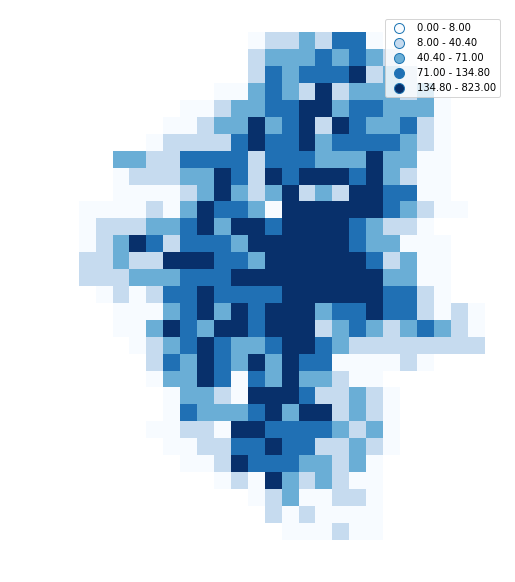

In [46]:
# mapa de total de accidentes en m500

f, ax = plt.subplots(1, figsize=(8, 10))
ax = m500.plot(ax=ax, alpha=1, legend=True, scheme='quantiles', k=5, cmap='Blues', column='TOTAL')
# escala de ejes igual
lims = plt.axis('equal')
# quitar ejes
ax.set_axis_off()
plt.show()

In [47]:
m500['TOTAL'].sum()

41918.0

In [48]:
# escribir m500 (con conteos) en csv
m500.to_csv(path+"4_accidentes/m500_c.csv")